<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5DSP_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ニューラルネットワークの順伝播**

In [1]:
import numpy as np


In [2]:
input_size = 2
hidden_size = 3
output_size = 2


In [3]:
W1 = np.random.rand(input_size, hidden_size)
b1 = np.random.rand(hidden_size)
W2 = np.random.rand(hidden_size, output_size)
b2 = np.random.rand(output_size)

In [4]:
sigmoid = lambda x: 1/(1+np.exp(-x))

※ラムダ(lambda)式  
単一の数式などをわざわざ関数として定義せず一つの式のように記述する方法  
以下の２つのコードは同じ動作をします

```
sigmoid = lambda x: 1/(1+np.exp(-x))
```
```
def sigmoid(x):
  return 1/(1+np.exp(-x))
```

In [5]:
def predict(x):
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    y = sigmoid(a2)
    return y

In [6]:
x = np.array([0, 1])
predict(x)

array([0.90656093, 0.87855351])

#**勾配法**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### 最適化する関数の設定
最適化する関数$y$を${\rm cos}x$とする
$$
y = {\rm cos}x
$$

$$
\frac{{\rm d}y}{{\rm d}x}=\frac{{\rm d}}{{\rm d}x}{\rm cos}x=-{\rm sin}x
$$

In [8]:
def func(x):
    return np.cos(x)

def diff_func(x):
    return -1*np.sin(x)

### 初期状態
```
point = 5.5
```
を適当な値に変えて実行しても良い

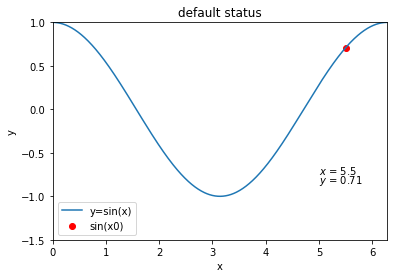

In [9]:
point = 5.5
x = np.arange(0, 2*np.pi, 1/100)
plt.plot(x, func(x), label="y=sin(x)")
plt.scatter(point, func(point), label="sin(x0)", marker='o', c='r')
plt.title("default status")
plt.text(5, -0.75, "$x$ = "+str(point))
plt.text(5, -0.85, "$y$ = "+str('{:.2f}'.format(func(point))))
plt.ylim(-1.5, 1)
plt.xlim(0, 2*np.pi)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
count = 0
plt.show();

### 勾配法を用いた最適化
以下のコードセルを繰り返し実行するたびに結果が更新されます．  
(Ctrl+Enterで移動せずにセルを実行できます）

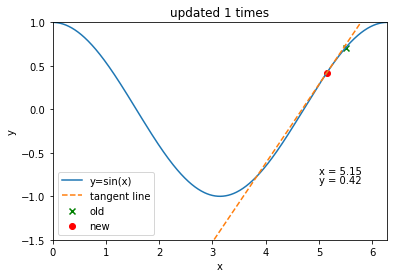

In [10]:
count +=1
plt.scatter(point, func(point), label="old", marker='x', c='g')
learning_rate = 0.5
point += -1*learning_rate*diff_func(point)

plt.plot(x, func(x), label="y=sin(x)")
plt.plot(x, diff_func(point)*x+func(point)-diff_func(point)*point, \
         label="tangent line", linestyle="--")
plt.scatter(point, func(point), label="new", marker='o', c='r')

plt.ylim(-1.5, 1)
plt.xlim(0, 2*np.pi)
plt.xlabel("x")
plt.ylabel("y")
plt.title("updated "+str(count)+" times")
plt.text(5, -0.75, "x = "+str('{:.2f}'.format(point)))
plt.text(5, -0.85, "y = "+str('{:.2f}'.format(func(point))))
plt.legend(loc='lower left')
plt.show();

## ニューラルネットワークの実装

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### digits datasetの読み込み

In [12]:
digits = load_digits()

#### データの確認

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]


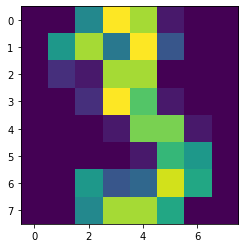

In [13]:
num = 3
plt.imshow(digits.images[num])
print(digits.data[num])

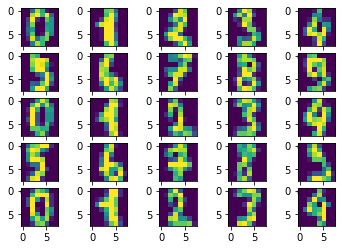

In [14]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(digits.images[i])

### 訓練データとテストデータの分離

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test =train_test_split(digits.data, digits.target, random_state=1)

### 識別器の生成

In [17]:
from sklearn.neural_network import MLPClassifier

↓ここの数値をいじってみる  
hidden_layer_sizesやsolverなど  

In [25]:
nn = MLPClassifier(hidden_layer_sizes=10, solver='lbfgs')

訓練データを用いた識別器の学習

In [26]:
nn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=10, solver='lbfgs')

#**テストデータを用いたモデルの評価**


### テストデータを用いたモデルの評価


In [30]:
nn.score(X_test, y_test)

0.8577777777777778

#### 混同行列

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

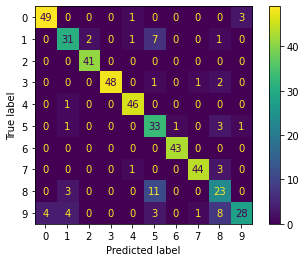

In [32]:
ConfusionMatrixDisplay.from_estimator(nn, X_test, y_test)